# **Customer Attrition Analysis and Prediction in Banking Using Machine Learning Techniques**

In this project, we will analyze customer attrition data from a bank and develop machine learning models to predict customer churn. This is an important business problem, as retaining existing customers is less expensive than acquiring new ones. By predicting churn, the bank can take proactive measures to improve customer retention.

## **Import Libraries**

First, let's import the necessary libraries that we'll be using throughout this notebook.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## **Load and Explore the Data**

We start by loading the customer data from a CSV file, and then we perform some initial exploration to understand the structure of the data.

In [62]:
# Load the data
data =  pd.read_csv('/Users/oswaldo/Documents/Coursework/data/BankChurners.csv')

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


The data contains two columns located at the end of the dataset that we won't be needing for our analysis. These columns can be dropped.

In [63]:
# Drop the last two columns
data = data.drop(columns=[
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
])

# Display the first few rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


It's important to have a good understanding of the statistics of our data. This includes understanding the distribution of values in each column, as well as the relationships between different columns. The data is distributed by 8500 Existing Customers and 1627 Attrited Customers.

In [64]:
# Summary statistics for numerical features
data.describe()

# Check the distribution of the target variable
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Understanding the categorical features is also an important part of data exploration.

In [65]:
# Extract categorical columns and print the unique values and counts
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"{col}:\n{data[col].value_counts()}\n{'-'*50}")


Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
--------------------------------------------------
Gender:
Gender
F    5358
M    4769
Name: count, dtype: int64
--------------------------------------------------
Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------------------------------------------------
Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------------------------------------------------
Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
--------------------------------------------------
Card_Category:
Card_Category
Blue       

## **Data Visualization**

Visualizing data can often provide insights that are not immediately apparent from looking at the raw data. It's also a great way to communicate findings to others, especially those who may not be as familiar with the data.

### **Distribution of Customer Attrition**

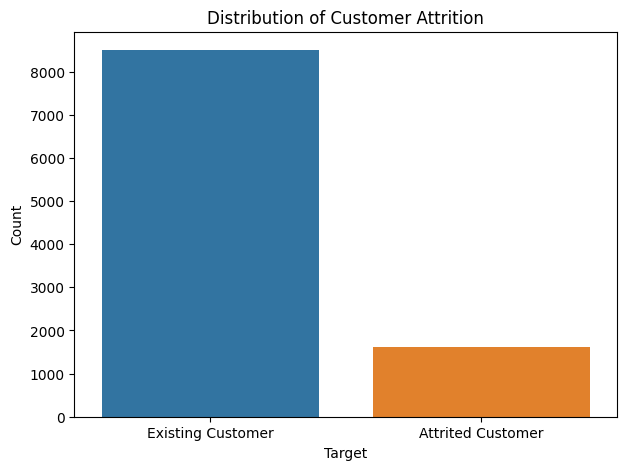

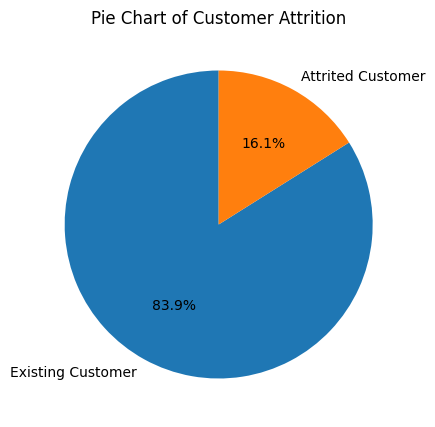

In [59]:
# Count plot of Attrition_Flag
plt.figure(figsize=(7,5))
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribution of Customer Attrition')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Pie chart of Attrition_Flag
plt.figure(figsize=(7,5))
data['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Customer Attrition')
plt.ylabel('') 
plt.show()

The target variable Attrition_Flag has two classes: Existing Customer and Attrited Customer. We can see that we have more Existing Customer records (83.9%) than Attrited Customer records (16.1%). This indicates that we're dealing with an imbalanced dataset. We'll need to keep this in mind when training our machine learning models, as they can have a bias towards the majority class.

## **Distribution of Marital Status for Each Gender**

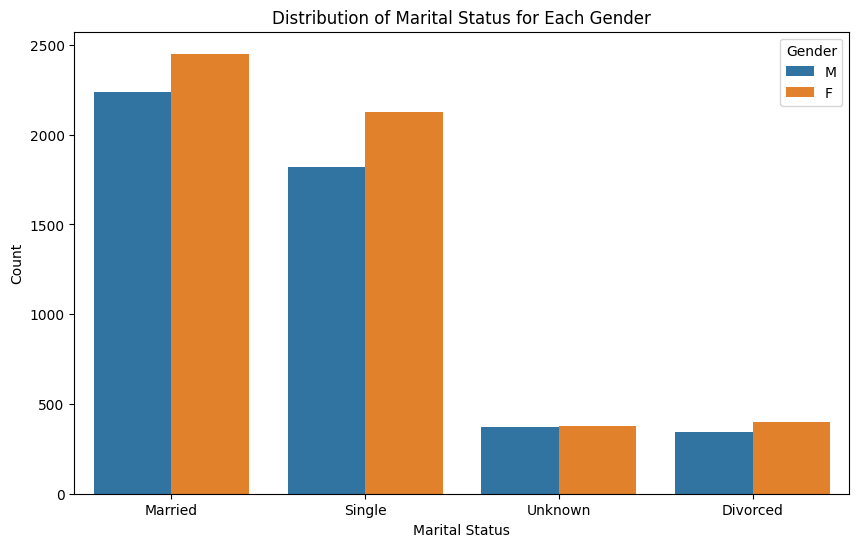

In [60]:
# Count plot of Marital_Status for each Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Gender', data=data)
plt.title('Distribution of Marital Status for Each Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Here are some observations:

- For both genders, the majority of customers are either married or single.
- There are more female customers than male customers in each marital status category.
- The distribution of marital status is similar for both genders, with married being the most common status, followed by single, divorced, and unknown.

## **Distribution of Education Level**

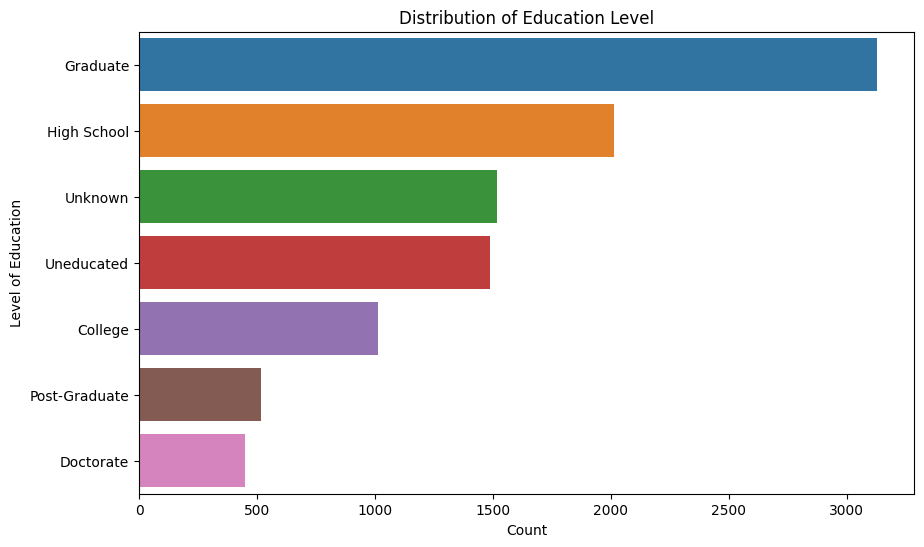

In [66]:
# Count plot of Education_Level
plt.figure(figsize=(10, 6))
sns.countplot(y='Education_Level', data=data, order=data['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Level of Education')
plt.show()

Here are some observations:

- A large number of customers are graduates, followed by those with a high school education.
- The number of customers who are uneducated or have an unknown education level are roughly the same.
- There are fewer customers who have attended college or achieved post-graduate or doctorate degrees.

## **Distribution of Income Category for Each Attrition Flag**

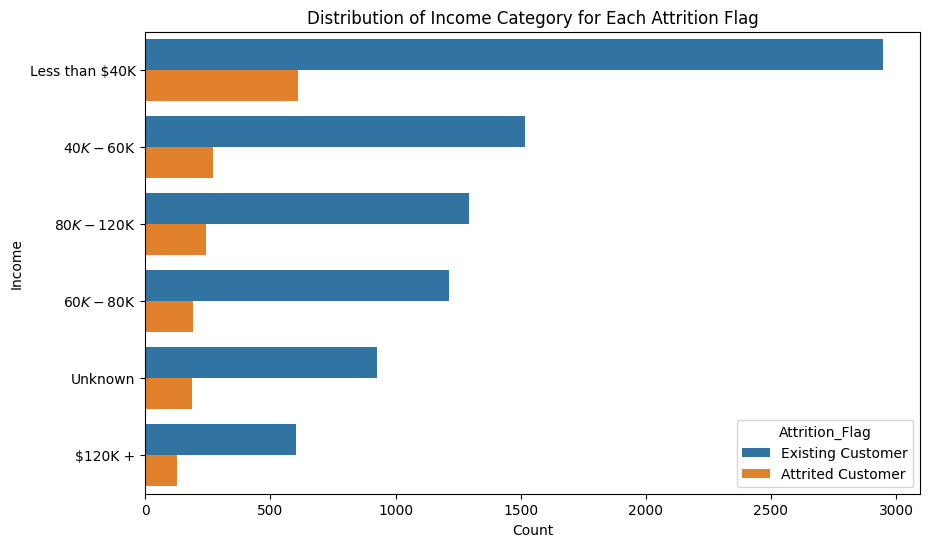

In [67]:
# Count plot of Income_Category for each Attrition_Flag
plt.figure(figsize=(10, 6))
sns.countplot(y='Income_Category', hue='Attrition_Flag', data=data, order=data['Income_Category'].value_counts().index)
plt.title('Distribution of Income Category for Each Attrition Flag')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

Here are some observations:

- For all income categories, the number of existing customers is higher than the number of attrited customers, which is consistent with the overall class imbalance we observed earlier.
- The attrition rate seems to be similar across all income categories, but it's worth noting that the categories Less than $40K, $40K - $60K, and $80K - $120K have the highest number of attrited customers.
- There are relatively fewer attrited customers in the Unknown and $120K + income categories.

## **Distribution of Education Level for Each Attrition Flag**

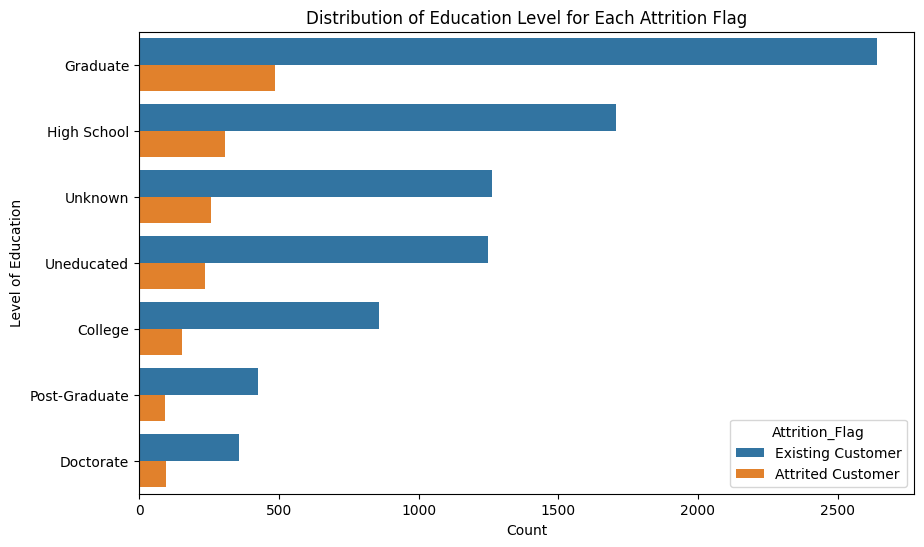

In [68]:
# Count plot of Education_Level for each Attrition_Flag
plt.figure(figsize=(10, 6))
sns.countplot(y='Education_Level', hue='Attrition_Flag', data=data, order=data['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level for Each Attrition Flag')
plt.xlabel('Count')
plt.ylabel('Level of Education')
plt.show()

Here are some observations:

- Customers with a Graduate degree make up the largest segment for both existing and attrited customers. It suggests that the bank's customer base is highly educated, but also that this group is the most likely to leave.
- The Unknown category, surprisingly, has a significant number of attritions. This could point towards a potential data collection or entry issue that might be impacting customer service and causing churn.
- The least attrition is observed in customers who have a Doctorate. It could be that this group finds the services or the offerings of the bank most suitable.

## **Distribution of Card Category for Each Attrition Flag**

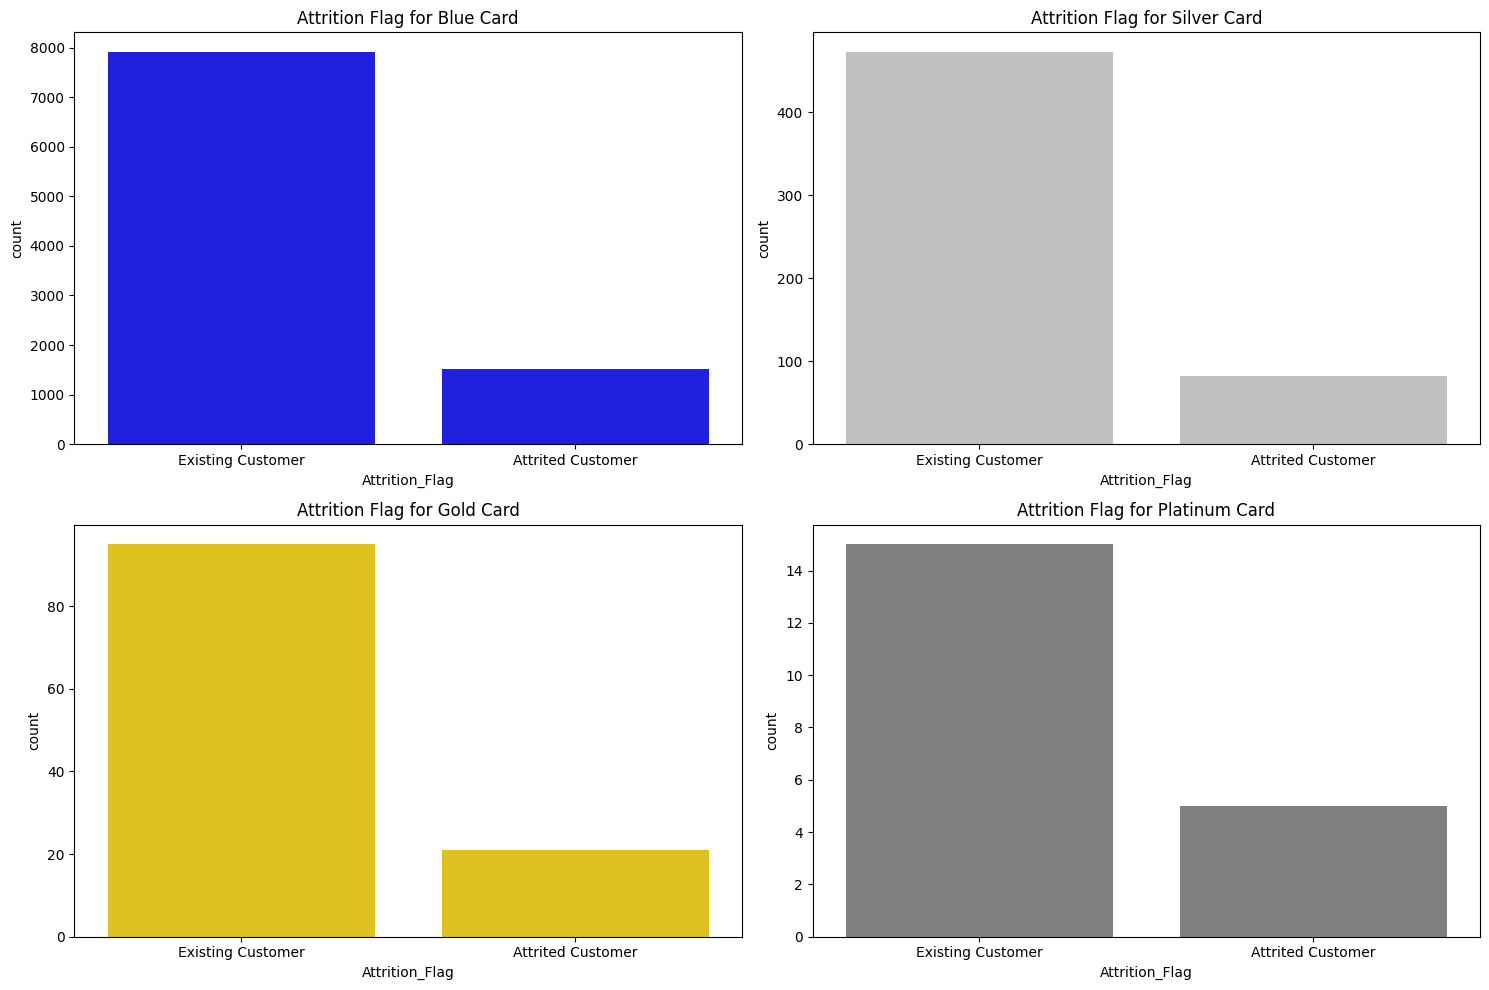

In [71]:
# Create separate plots for each Card_Category with corresponding colors
colors = {'Blue': 'blue', 'Silver': 'silver', 'Gold': 'gold', 'Platinum': 'gray'}

# Create separate plots for each Card_Category
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

card_categories = list(colors.keys())

for i, ax in enumerate(ax.flat):
    card_category = card_categories[i]
    sns.countplot(data=data[data['Card_Category'] == card_category], x='Attrition_Flag', ax=ax, color=colors[card_category])
    ax.set_title(f'Attrition Flag for {card_category} Card')

plt.tight_layout()
plt.show()

Here some observations:

- Blue Card: Majority of customers have the Blue card, and correspondingly, attrition is highest among this group.
- Silver Card: Compared to Blue card holders, a significantly smaller number of customers have the Silver card, and attrition is also lower.
- Gold Card: Even fewer customers have the Gold card, and attrition in this group is comparatively lower still.
- Platinum Card: The Platinum card holders make up the smallest group, and attrition is lowest among them.

## **Distribution of Credit Limit for Each Attrition Flag**

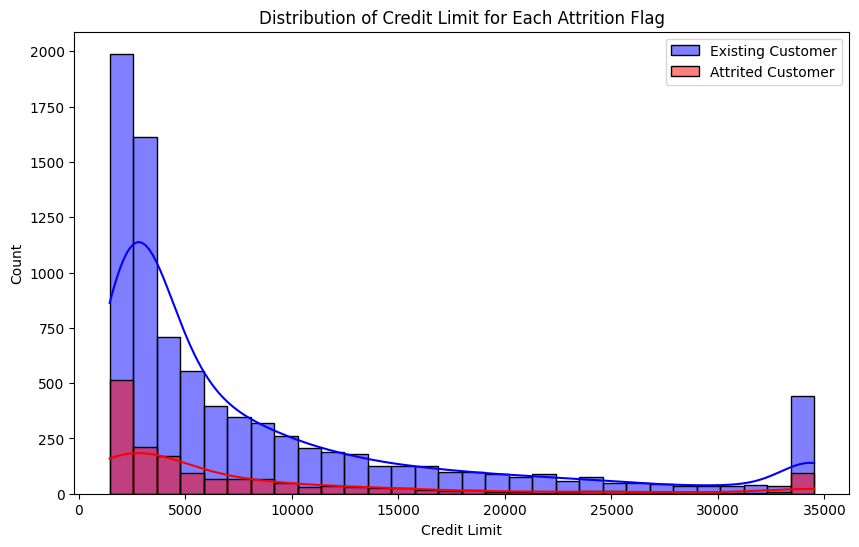

In [72]:
# Histogram of Credit_Limit for each Attrition_Flag
plt.figure(figsize=(10, 6))

# Histogram for Existing Customers
sns.histplot(data[data['Attrition_Flag'] == 'Existing Customer']['Credit_Limit'], 
             bins=30, color='blue', label='Existing Customer', kde=True)

# Histogram for Attrited Customers
sns.histplot(data[data['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'], 
             bins=30, color='red', label='Attrited Customer', kde=True)

plt.title('Distribution of Credit Limit for Each Attrition Flag')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.legend()
plt.show()

Here are the observations:

- For both existing and attrited customers, most have a credit limit less than 10,000. The number of customers decreases as the credit limit increases, indicating a right-skewed distribution.
- There are more existing customers than attrited customers at every credit limit level.
- The distribution shapes for existing and attrited customers look somewhat similar.

## **Correlation Between Features**

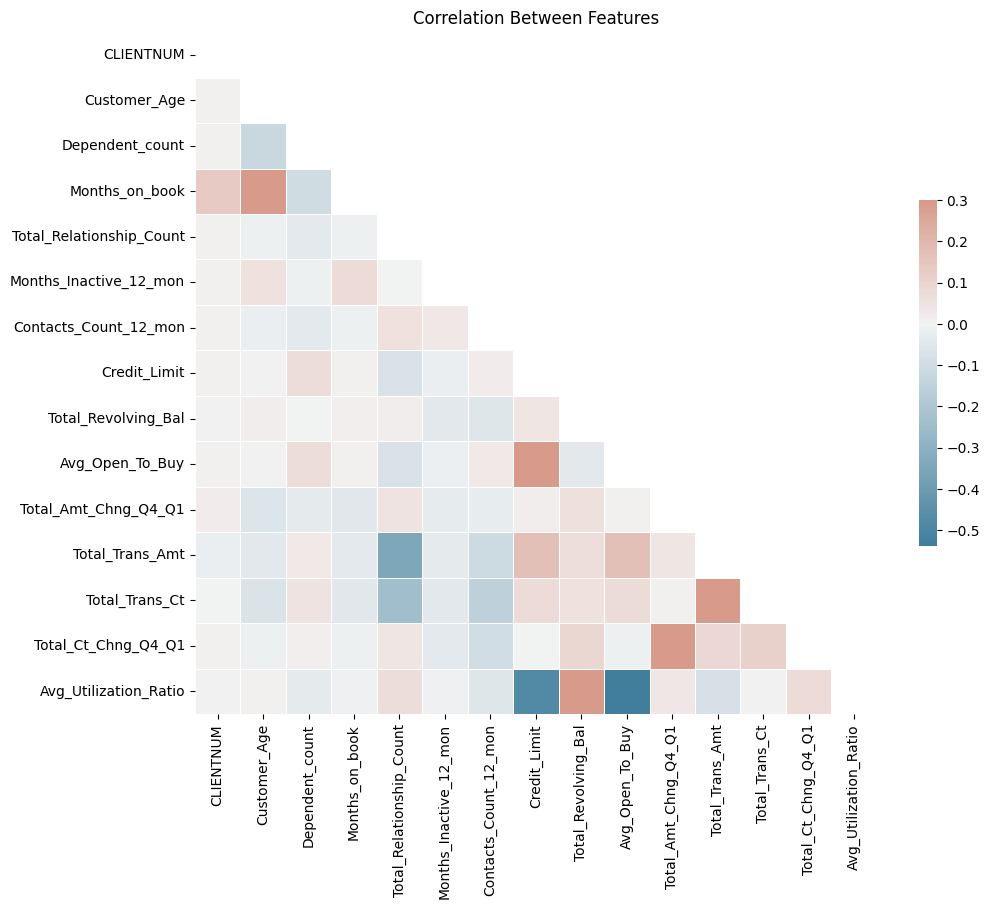

In [73]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numerical_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Between Features')
plt.show()

The heatmap above displays the correlation between numerical features in our dataset. Positive values indicate a positive correlation, while negative values indicate a negative correlation. The strength of the correlation is indicated by the color intensity.

Here are some observations:

- Customer_Age and Months_on_book show a strong positive correlation, suggesting that older customers tend to have a longer relationship with the bank.
- Total_Trans_Amt and Total_Trans_Ct also show a strong positive correlation, indicating that customers who make more transactions also tend to have a higher total transaction amount.
- Avg_Open_To_Buy and Credit_Limit are strongly positively correlated, which is expected as they are directly related.
- Avg_Utilization_Ratio and Total_Revolving_Bal are strongly positively correlated.

## **Check Missing Values**

In [74]:
# Check the percentage of missing values in each column
missing_values = data.isnull().sum() / len(data) * 100

missing_values

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

There are no missing values in our dataset. This is an advantage for the machine learning models.

## **Identifying Outliers**

In [75]:
# Compute Z-scores
z_scores = numerical_data.apply(zscore)

# Identify outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Get a summary of outliers
outliers_summary = outliers.sum().sort_values(ascending=False)
outliers_summary[outliers_summary > 0]

Total_Trans_Amt           391
Total_Amt_Chng_Q4_Q1      163
Months_Inactive_12_mon    124
Total_Ct_Chng_Q4_Q1       113
Contacts_Count_12_mon      54
Total_Trans_Ct              2
Customer_Age                1
dtype: int64

These outliers might represent unusual behavior or errors in the data. In a machine learning context, outliers can significantly impact the performance of some models.

A common transformation for this purpose is the log transformation, which can reduce the impact of extreme values. However, the log transformation can only be applied to positive values. Since we have negative numbers in our dataset, we will use the Yeo-Johnson transformation, which is a generalized version of the Box-Cox transformation. This transformation can handle both positive and negative values.

## **Yeo-Johnson transformer for outliers handling**

In [76]:
# Initialize a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
numerical_data_transformed = pt.fit_transform(numerical_data)

# Convert the transformed data back into a dataframe
numerical_data_transformed = pd.DataFrame(numerical_data_transformed, columns=numerical_data.columns)

numerical_data_transformed.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3.996803e-15,-0.168365,0.516327,0.371128,0.762305,-1.458324,0.495883,0.962782,-0.003768,0.930320,2.259377,-1.820680,-0.964211,3.016295,-0.768027
1,9.325873e-15,0.331118,1.979971,1.015094,1.417080,-1.458324,-0.406084,0.566512,0.076214,0.554222,2.803534,-1.605685,-1.397079,6.011005,-0.497366
2,-3.108624e-15,0.581381,0.516327,-0.009129,0.112803,-1.458324,-2.246757,-0.416953,-1.666149,-0.041640,4.654269,-0.953314,-2.078301,4.359489,-1.201678
3,3.996803e-15,-0.790608,1.255981,-0.259895,-0.530415,1.525554,-1.318361,-0.456520,1.114008,-1.128002,2.454134,-1.778915,-2.078301,4.359489,1.484731
4,-3.774758e-15,-0.790608,0.516327,-1.827473,0.762305,-1.458324,-2.246757,-0.028788,-1.666149,0.205257,4.056715,-2.440781,-1.649743,4.612643,-1.201678


## **One-Hot Encoding for Categorical Variables**

In [77]:
# Separate input features and target variable
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Get categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the categorical features
X = pd.get_dummies(X, columns=categorical_features)

X.head()

# Apply the Yeo-Johnson transformation
X = pt.fit_transform(X)

This method works by creating a new binary column for each category in the original column. 

Before encoding the categorical variables, we need to separate our target variable (Attrition_Flag) from the other variables. In the case of the target variable, we will simply map Existing Customer to 0 and Attrited Customer to 1 using Label Encoder. 

## **Split the data into a training set and a test set**

In [78]:
# Split the data into a training set and a test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Print the shapes of the train/test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6785, 38), (3342, 38), (6785,), (3342,))

Here are the shapes of the resulting sets:

- Training set: 6785 samples, each with 38 features
- Test set: 3342 samples, each with 38 features

## **Models Training and Evaluation**

We will train four different models: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting Machine.

We'll then evaluate each model based on its accuracy on the test set.

In [80]:
# Initialize the models
lr = LogisticRegression(random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
gbm = GradientBoostingClassifier(random_state=seed)

# List of models
models = [lr, dt, rf, gbm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Machine']

# Fit each model and apply classification report
for model, name in zip(models, model_names):
    # Fit the model
    model.fit(X_train, y_train)
    
    print(f"Classification Report for {name}:")
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("\n" + "="*60 + "\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       541
           1       0.93      0.97      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.86      0.79      0.82      3342
weighted avg       0.91      0.91      0.91      3342



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       541
           1       0.96      0.96      0.96      2801

    accuracy                           0.93      3342
   macro avg       0.87      0.86      0.87      3342
weighted avg       0.93      0.93      0.93      3342



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       541
           1       0.96      0.99      0.97      2801

    accuracy                           0.95      

Here is an overview of the results:

**Logistic Regression:** The model achieves an overall accuracy of 91%, indicating that it correctly predicts whether a customer will churn or not 91% of the time. The precision for predicting attrited customers (0) is 79%, and the recall is 62%, suggesting that the model has a harder time identifying customers who will churn. On the other hand, it performs quite well in predicting existing customers (1) with a precision of 93% and recall of 97%.

**Decision Tree:** The Decision Tree model improves upon Logistic Regression with an overall accuracy of 93%. It has a precision of 78% and recall of 77% for attrited customers, and a precision of 96% and recall of 96% for existing customers. This indicates that the model is more balanced in predicting both classes compared to Logistic Regression.

**Random Forest:** The Random Forest model performs even better with an overall accuracy of 95%. It has a high precision of 93% and recall of 77% for attrited customers, and a precision of 96% and recall of 99% for existing customers. This suggests that the model is quite good at predicting existing customers but still misses a significant portion of attrited customers.

**Gradient Boosting Machine (GBM):** The GBM model achieves the highest overall accuracy of 96%. It has a precision of 92% and recall of 84% for attrited customers, and a precision of 97% and recall of 99% for existing customers. This indicates that the GBM model is the best at predicting both classes among the four models tested.


Now we will further improve our models accuracy with other techniques such as SMOTE and Grid Search.

## **SMOTE**

In our dataset, there is an imbalance in the classes with the majority being 'Existing Customer' and the minority being 'Attrited Customer' as seen in the **Distribution of Customer Attrition** plot. This imbalance can lead to models predicting the majority class well, but not the minority class, as we've seen in our models. 

**SMOTE (Synthetic Minority Over-sampling Technique)** is a technique that generates synthetic samples from the minority class in order to reach a balance between the minority and majority class. This technique can improve the performance of the predictive model by balancing out our dataset and giving the model more information to learn from the minority class.

In [81]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=seed)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Initialize the models
lr = LogisticRegression(random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
gbm = GradientBoostingClassifier(random_state=seed)

# List of models
models = [lr, dt, rf, gbm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Machine']

# Fit each model on the SMOTE data and apply classification report
for model, name in zip(models, model_names):
    # Fit the model
    model.fit(X_train_smote, y_train_smote)
    
    print(f"Classification Report for {name}:")
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("\n" + "="*60 + "\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       541
           1       0.97      0.87      0.92      2801

    accuracy                           0.87      3342
   macro avg       0.77      0.86      0.80      3342
weighted avg       0.90      0.87      0.88      3342



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       541
           1       0.97      0.94      0.95      2801

    accuracy                           0.92      3342
   macro avg       0.85      0.89      0.86      3342
weighted avg       0.93      0.92      0.92      3342



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.96      

Let's compare the results:

**Logistic Regression:**
**Before SMOTE** 
The model had an accuracy of 91%, with a recall of 62% for attrited customers.

**After SMOTE** 
The model's accuracy dropped slightly to 87%, but the recall for attrited customers significantly improved to 84%. This suggests that SMOTE helped the model to better identify attrited customers, although with some decrease in overall accuracy.

**Decision Tree:**
**Before SMOTE**
The model had an accuracy of 93%, with a recall of 77% for attrited customers.

**After SMOTE**
The model's accuracy dropped slightly to 92%, but the recall for attrited customers improved to 83%. Again, this suggests that SMOTE helped the model to better identify attrited customers.

**Random Forest:**
**Before SMOTE**
The model had an accuracy of 95%, with a recall of 77% for attrited customers.

**After SMOTE**
The model's accuracy improved slightly to 96%, and the recall for attrited customers significantly improved to 86%. This indicates that SMOTE greatly improved the model's ability to identify attrited customers.

**Gradient Boosting Machine (GBM):**
**Before SMOTE**
The model had an accuracy of 96%, with a recall of 84% for attrited customers.

**After SMOTE**
The model maintained an accuracy of 96%, and the recall for attrited customers improved to 91%. This suggests that SMOTE improved the GBM model's performance on attrited customers without affecting the overall accuracy.

## **Grid Search**

**Grid Search:** Hyperparameter tuning is a critical step in building a machine learning model. Grid Search is a technique which we can use to perform hyperparameter tuning in order to determine the optimal values for a given model.  In other words, we can set up a grid of hyperparameter values and for each combination, train a model and score on the validation data. In the end, we select the hyperparameters that give the best performance.

In [82]:
# Set up the parameter grids
lr_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10]
}

dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gbm_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}

# Set up the models
lr = LogisticRegression(random_state=seed)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
gbm = GradientBoostingClassifier(random_state=seed)

# Set up the parameter grid dictionary
grid_dict = {
    'Logistic Regression': [lr, lr_grid],
    'Decision Tree': [dt, dt_grid],
    'Random Forest': [rf, rf_grid],
    'Gradient Boosting Machine': [gbm, gbm_grid]
}

# Dictionary to store the best parameters for each model
best_params_dict = {}

# Perform the grid search
for model_name, model_and_grid in grid_dict.items():
    model = model_and_grid[0]
    param_grid = model_and_grid[1]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_params_dict[model_name] = grid_search.best_params_

# Print the best parameters for each model
for model_name, best_params in best_params_dict.items():
    print(f"Best parameters for {model_name}:")
    print(best_params)
    print("\n" + "="*60 + "\n")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ....................................C=1

/Users/oswaldo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/oswaldo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oswaldo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/oswaldo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oswaldo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `p

[CV] END .................................C=10, penalty=none; total time=   0.0s
[CV] END .................................C=10, penalty=none; total time=   0.0s
[CV] END .................................C=10, penalty=none; total time=   0.0s
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ...criterion=gini, max_depth=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.1s[CV] END ...criterion=gini, max_depth=5, min_samples_split=2; total time=   0.0s

[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_sam

From the results, we can observe:

**Logistic Regression:**
The optimal parameters are 'C': 1, 'penalty': 'l2'

**Decision Tree:**
The best parameters 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2

**Random Forest:**
The best parameters 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100

**Gradient Boosting Machine:**
The best parameters 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200

## **Aplying the best parameters to the models**

Let's now check how the accureacy improved after Hyperparameter Tunning

In [83]:
# Initialize the models with the best parameters
lr_best = LogisticRegression(C=1, penalty='l2', random_state=seed)
dt_best = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=seed)
rf_best = RandomForestClassifier(max_depth= None, min_samples_split= 5, n_estimators= 100, random_state=seed)
gbm_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=seed)

# List of models
models_best = [lr_best, dt_best, rf_best, gbm_best]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Machine']

# Fit each model on the training data and apply classification report
for model, name in zip(models_best, model_names):
    # Fit the model
    model.fit(X_train, y_train)
    
    print(f"Classification Report for {name}:")
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("\n" + "="*60 + "\n")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       541
           1       0.93      0.97      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.86      0.79      0.82      3342
weighted avg       0.91      0.91      0.91      3342



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       541
           1       0.96      0.97      0.96      2801

    accuracy                           0.94      3342
   macro avg       0.89      0.87      0.88      3342
weighted avg       0.93      0.94      0.94      3342



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       541
           1       0.95      0.99      0.97      2801

    accuracy                           0.95      

Here's an analysis of the results after hyperparameter tuning via Grid Search:

**Logistic Regression:**  
The performance of the model remains the same after hyperparameter tuning with an accuracy of 91%. The recall for attrited customers is still 62%. Therefore, Grid Search did not improve the performance of the Logistic Regression model.

**Decision Tree:**  
The overall accuracy of the Decision Tree model after hyperparameter tuning slightly increased to 94% from 93%. The recall for attrited customers also improved to 78% from 77%. This indicates that the Decision Tree model slightly improved after hyperparameter tuning.

**Random Forest:**  
The overall accuracy of the Random Forest model remained the same after hyperparameter tuning at 95%. However, the recall for attrited customers decreased slightly to 74% from 77%. This suggests that the performance of the Random Forest model slightly decreased after hyperparameter tuning.

**Gradient Boosting Machine (GBM):**  
The overall accuracy of the GBM model improved to 97% from 96% after hyperparameter tuning. The recall for attrited customers also improved significantly to 89% from 84%. This indicates that the performance of the GBM model improved the most from hyperparameter tuning among the four models.

# **Conclusion**

This project aimed to build machine learning models to predict customer attrition for a credit card portfolio based on a variety of demographic, behavioral, and financial features.

The initial exploratory data analysis revealed key insights about the data, such as the distribution of various features and the presence of class imbalance in the target variable, with far more existing customers than attrited ones. This class imbalance posed a significant challenge for the predictive models. Several machine learning models were tested, including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting Machine (GBM). Each model was evaluated based on its ability to accurately predict both existing and attrited customers.

Initially, the models struggled to predict attrited customers effectively, primarily due to the class imbalance. To address this issue, the Synthetic Minority Over-sampling Technique (SMOTE) was applied, creating synthetic samples of the minority class to balance the dataset. After applying SMOTE, all models showed improved performance in predicting attrited customers.

Next, hyperparameter tuning was conducted using Grid Search to find the optimal settings for each model. This step further improved the performance of the Decision Tree and GBM models. However, it did not improve the Logistic Regression model and slightly decreased the performance of the Random Forest model.

In the end, the GBM model outperformed the others in terms of both accuracy and recall for attrited customers, making it the best model for this task among the four. It achieved an accuracy of 97% and recall of 89% for attrited customers after hyperparameter tuning.

In conclusion, this project demonstrates the importance of proper data exploration, handling class imbalance, and model tuning in predictive modeling tasks. While the GBM model was the best performer in this scenario, it's important to remember that the optimal model and techniques may vary according to the specific task and dataset. The results of this project could help the credit card company to more effectively predict and manage customer attrition, potentially leading to improved customer retention strategies.